In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [2]:
input_mat = io.loadmat('source/3.LPF/SonarAlt.mat')
input_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Feb 25 13:19:03 2010',
 '__version__': '1.0',
 '__globals__': [],
 'sonarAlt': array([[34.25491256, 33.60223519, 33.60223519, ..., 36.55540305,
         36.55540305, 36.55540305]])}

In [7]:
input_mat['sonarAlt'][0][0]

34.2549125576344

In [8]:
def get_sonar(i):
    """Measure sonar."""
    z = input_mat['sonarAlt'][0][i]  # input_mat['sonaralt']: (1, 1501)
    return z

def low_pass_filter(x_meas, x_esti):
    """Calculate average sonar using a low-pass filter."""
    x_esti = alpha * x_esti + (1 - alpha) * x_meas
    return x_esti

In [9]:
# Input parameters.
alpha = 0.7
n_samples = 500
time_end = 10

In [10]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_esti_save = np.zeros(n_samples)

In [11]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_esti = x_meas
    else:
        x_esti = low_pass_filter(x_meas, x_esti)

    x_meas_save[i] = x_meas
    x_esti_save[i] = x_esti

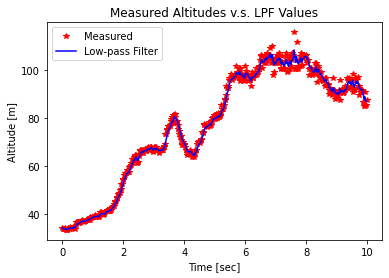

In [13]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_esti_save, 'b-', label='Low-pass Filter')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.savefig('low_pass_filter.png')
plt.show()